<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 9 (midnight), 2023 -->

# Illustrations of Data and Fits

By Erlend Lemva Ousdal, Kristen Joy Valseth, Vilde Gahr Sturtzel Lunde

This notebook contains the code used to represent the original data and the fitted data.

# Part 1: Model development using the Franke function

## Data, imports, and functions

Here, the packages needed are imported. The Franke function, functions calculating MSE and the R2-score, a function for K-fold cross-validation, and a function calculating the design matrix for a given polynomial degree are defined.

In [34]:
# Imports
import os
import pandas as pd
import numpy as np
from random import random, seed

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import seaborn as sns
sns.set_style("ticks")

# Generating the Franke function
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4
noise = 0 # Adjust by a small number (<<1)
z = FrankeFunction(x, y) + noise * np.random.randn(20) 
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

# Making the R2 and MSE functions
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def design_matrix(x, y, degree):
    X = np.ones((len(x), 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X = np.c_[X, (x ** (i - j)) * (y ** j)]
    return X

## Illustrating the Franke function

The Franke function is illustrated in 3D and 2D.

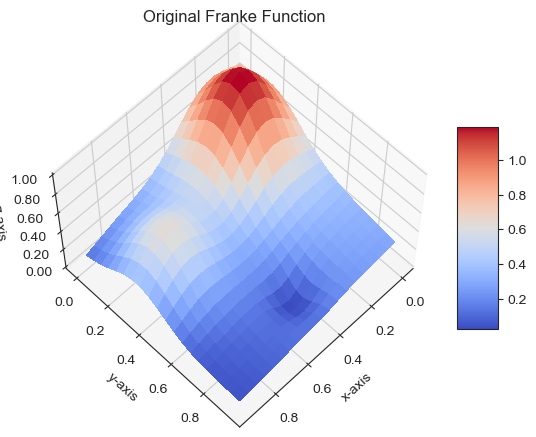

In [35]:
#Plotting the original Franke function in 3D
fig = plt.figure(figsize=(5.5,4.5))
left, bottom, width, height = 0.09, 0.02, 0.9, 0.9
ax = fig.add_axes([left, bottom, width, height], projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('Original Franke Function')
ax.set_zticks([0,0.2,0.4,0.6,0.8,1])
ax.view_init(azim=45, elev=60)
fig.savefig('Franke.pdf', format='pdf')
plt.show()

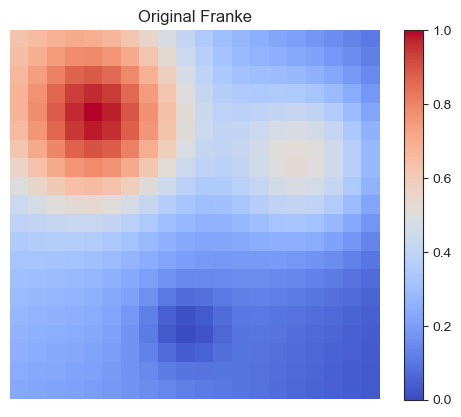

In [36]:
# Plotting original Franke function in 2D
mpl.rcParams['image.cmap'] = 'coolwarm'
fig, ax = plt.subplots()
franke = FrankeFunction(x, y)
ax.imshow(franke);
ax.set_title("Original Franke")
fig.colorbar(cm.ScalarMappable(cmap='coolwarm'), ax=ax);
ax.axis('off')
fig.tight_layout;
plt.savefig('Franke2D.pdf', format='pdf', bbox_inches="tight")

## OLS

The Franke function was fit using OLS. Here the fit using both 3D and 2D are illustrated.

In [37]:
# Fitting
degree = 5
X = design_matrix(x, y, degree)
linreg = LinearRegression()
predicted_OLS = cross_val_predict(linreg, X, z, cv=10)

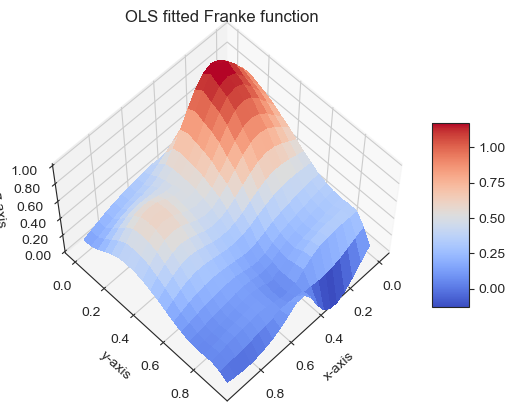

In [38]:
#Plotting the OLS-fitted Franke function in 3D
predicted_grid = predicted_OLS.reshape(x.shape)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, predicted_grid, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_zticks([0,0.2,0.4,0.6,0.8,1])
ax.set_title('OLS fitted Franke function')
ax.view_init(azim=45, elev=60)
plt.show()

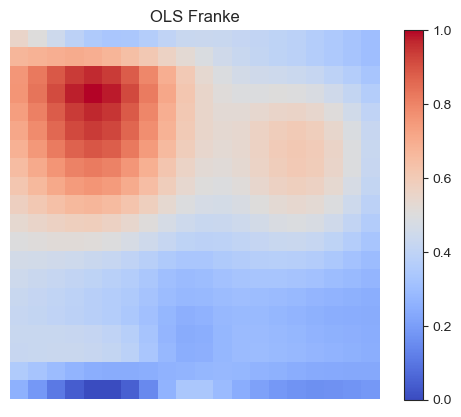

In [39]:
#Plotting the OLS-fitted Franke function in 2D
fig, ax = plt.subplots()
ax.set_title("OLS Franke")
fig.colorbar(cm.ScalarMappable(cmap='coolwarm'), ax=ax);
plt.imshow(predicted_OLS);
ax.axis('off')
fig.tight_layout;
plt.savefig('OLSFranke2D.pdf', format='pdf', bbox_inches="tight")

## Ridge

The Franke function was fit using Ridge. Here the fit using both 3D and 2D are illustrated.

In [40]:
# Fitting
alpha = 1e-10  # The lambda value
ridge = Ridge(alpha=alpha, fit_intercept = False)
predicted_Ridge = cross_val_predict(ridge, X, z, cv=10)

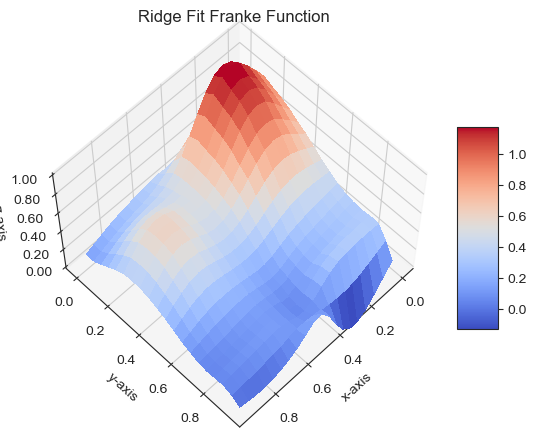

In [41]:
#Plotting the original Franke function
predicted_grid = predicted_Ridge.reshape(x.shape)
fig = plt.figure(figsize=(5.5,4.5))
left, bottom, width, height = 0.09, 0.02, 0.9, 0.9
ax = fig.add_axes([left, bottom, width, height], projection='3d')
surf = ax.plot_surface(x, y, predicted_grid, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('Ridge Fit Franke Function')
ax.view_init(azim=45, elev=60)
ax.set_zticks([0,0.2,0.4,0.6,0.8,1])
fig.savefig('Ridge3D.pdf', format='pdf')
plt.show()

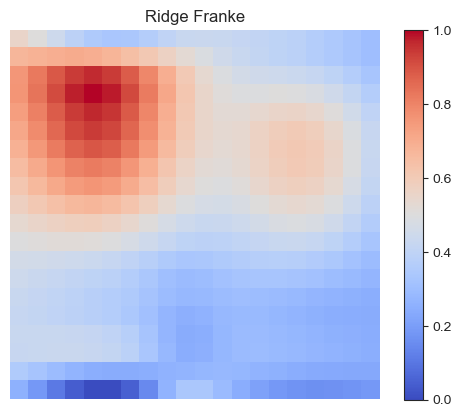

In [42]:
#Plotting the Ridge-fitted Franke function in 2D
fig, ax = plt.subplots()
ax.set_title("Ridge Franke")
fig.colorbar(cm.ScalarMappable(cmap='coolwarm'), ax=ax);
plt.imshow(predicted_Ridge);
ax.axis('off')
fig.tight_layout;
plt.savefig('RidgeFranke2D.pdf', format='pdf', bbox_inches="tight")

## Lasso

The Franke function was fit using Lasso. Here the fit using both 3D and 2D are illustrated.

In [43]:
# Fitting
lasso = Lasso(alpha=alpha, fit_intercept = False, tol = 0.0001)
predicted_Lasso = cross_val_predict(lasso, X, z, cv=10)

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.031e-03, tolerance: 5.710e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e-02, tolerance: 6.892e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.411e-02, tolerance: 8.371e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.237e-02, tolerance: 7.048e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.865e-03, tolerance: 2.650e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.457e-03, tolerance: 2.060e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e-02, tolerance: 2.071e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e-02, tolerance: 2.081e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e-02, tolerance: 1.136e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.906e-03, tolerance: 6.797e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.617e-02, tolerance: 1.072e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.365e-02, tolerance: 1.120e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.779e-02, tolerance: 8.950e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.468e-02, tolerance: 6.821e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.190e-03, tolerance: 2.630e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.142e-03, tolerance: 2.308e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e-02, tolerance: 2.802e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e-02, tolerance: 2.875e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

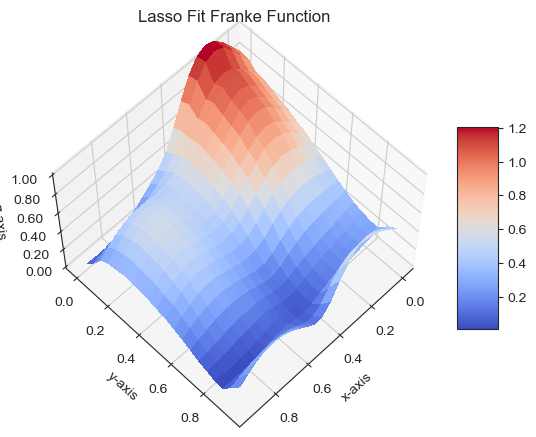

In [44]:
#Plotting the original Franke function
predicted_grid = predicted_Lasso.reshape(x.shape)
fig = plt.figure(figsize=(5.5,4.5))
left, bottom, width, height = 0.09, 0.02, 0.9, 0.9
ax = fig.add_axes([left, bottom, width, height], projection='3d')
surf = ax.plot_surface(x, y, predicted_grid, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('Lasso Fit Franke Function')
ax.view_init(azim=45, elev=60)
ax.set_zticks([0,0.2,0.4,0.6,0.8,1])
fig.savefig('Lasso3D.pdf', format='pdf')
plt.show()

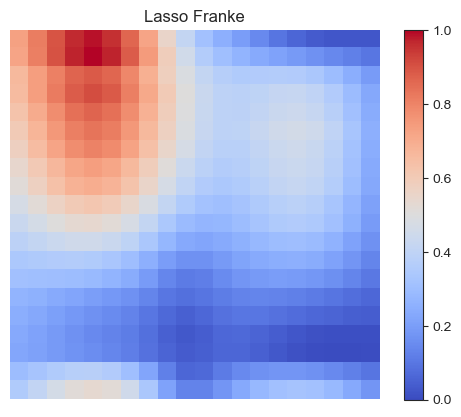

In [45]:
#Plotting the Lasso-fitted Franke function in 2D
fig, ax = plt.subplots()
ax.set_title("Lasso Franke")
fig.colorbar(cm.ScalarMappable(cmap='coolwarm'), ax=ax);
plt.imshow(predicted_Lasso);
ax.axis('off')
fig.tight_layout;
plt.savefig('LassoFranke2D.pdf', format='pdf', bbox_inches="tight")

# Part 2: Analysis of real terrain data

## Data, imports, and functions

Here, the packages needed are imported. The terrain data, functions calculating MSE and the R2-score, a function for K-fold cross-validation, and a function calculating the design matrix for a given polynomial degree are defined.

In [13]:
import numpy as np
import numpy as np
from numpy.random import normal, uniform
from random import random, seed
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import linear_model

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import seaborn as sns
sns.set_style("ticks")
palette = sns.color_palette("tab10")
sns.set_palette(palette)

# Making the R2 and MSE functions
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Load the terrain
terrain = imread('SRTM_data_Norway_1.tif');
N = 1000
terrain = terrain[:N,:N]

# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x, y = np.meshgrid(x,y)
z = terrain

#Making the data into lists
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

C:\Users\IFE12739\AppData\Local\Temp\ipykernel_19656\1229513898.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain = imread('SRTM_data_Norway_1.tif');


## Illustrating the terrain data

The terrain data is illustrated in 3D and 2D.

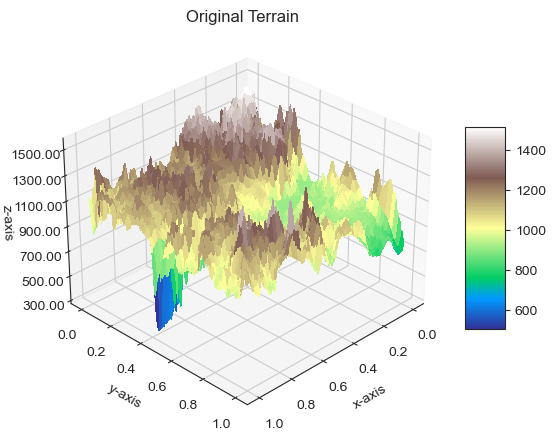

In [14]:
# Show the original terrain in 3D
fig = plt.figure(figsize=(5.5,4.5))
left, bottom, width, height = 0.09, 0.03, 0.9, 0.9
ax = fig.add_axes([left, bottom, width, height], projection='3d')
surf = ax.plot_surface(x, y, z, cmap='terrain', linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(azim=45, elev=30)
ax.set_title('Original Terrain')
ax.set_zticks([300, 500, 700, 900, 1100,1300,1500])
fig.savefig('Terrain.pdf', format='pdf')
plt.show()

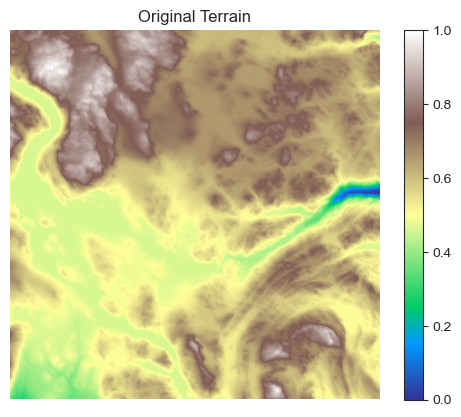

In [31]:
# Plotting original terrain data in 2D
fig, ax = plt.subplots()
ax.set_title('Original Terrain')
plt.imshow(terrain, cmap='terrain');
fig.colorbar(cm.ScalarMappable(cmap='terrain'), ax=ax);
ax.axis('off')
fig.tight_layout;
plt.savefig('Franke2D.pdf', format='pdf', bbox_inches="tight")

## OLS

The terrain data was fit using OLS. Here the fit using both 3D and 2D are illustrated.

In [16]:
# Fitting OLS
degree = 5
X = design_matrix(x, y, degree)
linreg = LinearRegression()
predicted_OLS = cross_val_predict(linreg, X, z, cv=10)

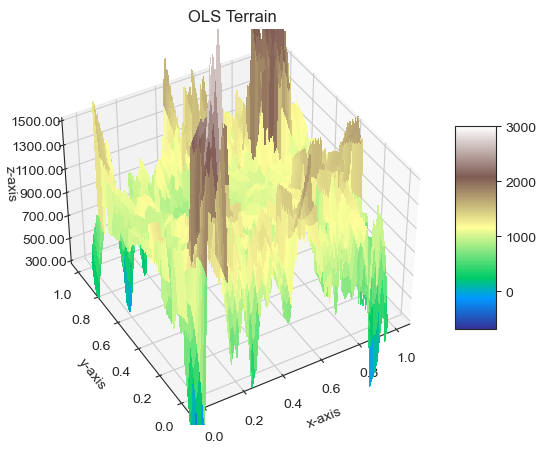

In [27]:
# Plotting the terrain data in 3D using OLS
predicted_grid = predicted_OLS.reshape(x.shape)
fig = plt.figure(figsize=(5.5,4.5))
left, bottom, width, height = 0.08, 0.03, 0.9, 0.9
ax = fig.add_axes([left, bottom, width, height], projection='3d')
surf = ax.plot_surface(x, y, predicted_grid, cmap='terrain',linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('OLS Terrain')
ax.set_zticks([300, 500, 700, 900, 1100,1300,1500])
ax.set_zlim(300, 1500)
ax.view_init(azim=240, elev=40)
fig.savefig('OLS3DTerrain.pdf', format='pdf')
plt.show()

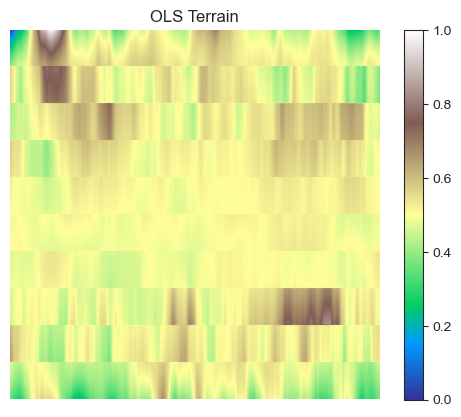

In [32]:
# Plotting the terrain data in 2D using OLS
fig, ax = plt.subplots()
ax.set_title("OLS Terrain")
plt.imshow(predicted_OLS, cmap='terrain');
fig.colorbar(cm.ScalarMappable(cmap='terrain'), ax=ax);
ax.axis('off')
fig.tight_layout;
plt.savefig('OLS2DTerrain.pdf', format='pdf', bbox_inches="tight")

## Ridge

The terrain data was fit using Ridge. Here the fit using both 3D and 2D are illustrated.

In [19]:
# Fitting Ridge
alpha = 1e-10
ridge = Ridge(alpha=alpha, fit_intercept = False)
predicted_Ridge = cross_val_predict(ridge, X, z, cv=10)

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

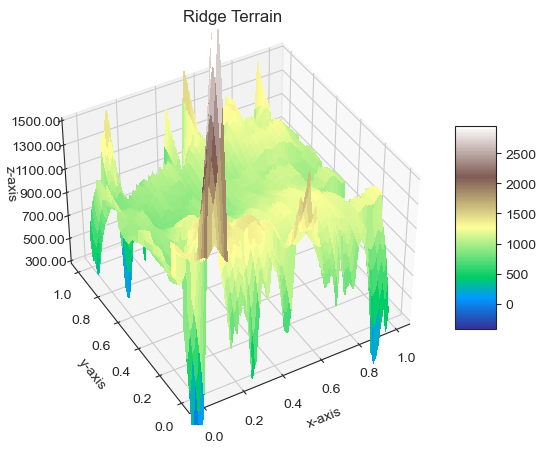

In [28]:
# Plotting the terrain data in 3D using Ridge
predicted_grid = predicted_Ridge.reshape(x.shape)
fig = plt.figure(figsize=(5.5,4.5))
left, bottom, width, height = 0.08, 0.03, 0.9, 0.9
ax = fig.add_axes([left, bottom, width, height], projection='3d')
surf = ax.plot_surface(x, y, predicted_grid, cmap='terrain',linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('Ridge Terrain')
ax.set_zticks([300, 500, 700, 900, 1100,1300,1500])
ax.set_zlim(300,1500)
ax.view_init(azim=240, elev=40)
fig.savefig('Ridge3Dterrain.pdf', format='pdf')
plt.show()

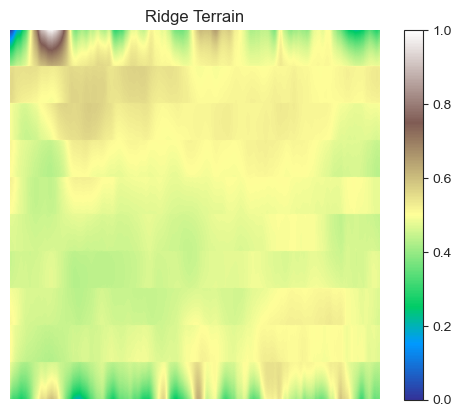

In [33]:
# Plotting the terrain data in 2D using Ridge
fig, ax = plt.subplots()
ax.set_title("Ridge Terrain")
fig.colorbar(cm.ScalarMappable(cmap='terrain'), ax=ax);
plt.imshow(predicted_Ridge, cmap='terrain');
ax.axis('off')
fig.tight_layout;
plt.savefig('Ridge2DTerrain.pdf', format='pdf', bbox_inches="tight")

## Lasso

The terrain data was fit using Lasso. Here the fit using both 3D and 2D are illustrated.

In [22]:
# Fitting OLS
lasso = Lasso(alpha=alpha, fit_intercept = False)
predicted_Lasso = cross_val_predict(lasso, X, z, cv=10)

C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.050e+06, tolerance: 1.107e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.917e+06, tolerance: 1.100e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\IFE12739\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

KeyboardInterrupt: 

In [ ]:
# Plotting the terrain data in 3D using Lasso
predicted_grid = predicted_Lasso.reshape(x.shape)
fig = plt.figure(figsize=(5.5,4.5))
left, bottom, width, height = 0.09, 0.03, 0.9, 0.9
ax = fig.add_axes([left, bottom, width, height], projection='3d')
surf = ax.plot_surface(x, y, predicted_grid, cmap='terrain',linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('Lasso Terrain')
ax.set_zticks([300, 500, 700, 900, 1100,1300,1500])
ax.set_zlim(300, 1500)
ax.view_init(azim=240, elev=40)
fig.savefig('Lasso3DTerrain.pdf', format='pdf')
plt.show()

In [ ]:
# Plotting the terrain data in 2D using Lasso
fig, ax = plt.subplots()
ax.set_title("Lasso")
fig.colorbar(cm.ScalarMappable(cmap='terrain'), ax=ax);
plt.imshow(predicted, cmap='terrain');
fig.tight_layout;
plt.savefig('Lasso2DTerrain.pdf', format='pdf', bbox_inches="tight")